# Image Tracking by using Interest Points

In [1]:
# Required Libraries
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Loading and displaying a Video File

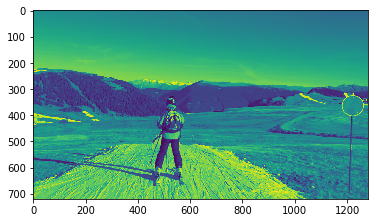

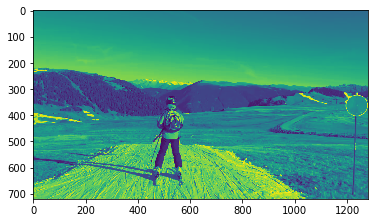

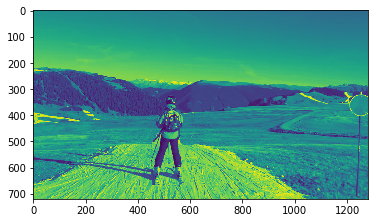

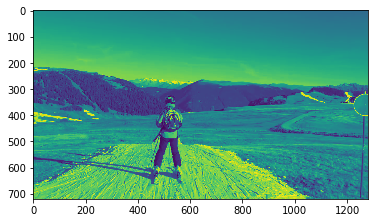

End of video


In [2]:
cap = cv2.VideoCapture('dolomites.mp4')
numOfFrames = 4
frameCount = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False or frameCount == numOfFrames:
        print("End of video")
        break;

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    plt.imshow(gray)
    plt.show()
    
    frameCount+=1

cap.release()

## Preconfiguration

What we are going to do first is to change the figure size for the Matplotlib plot.

In [3]:
plt.rcParams['figure.dpi'] = 150

Then, lets load the image that will be used to test the different feature detectors algorithms.

In [4]:
img = cv2.imread("deep_learning_book.jpg", cv2.IMREAD_GRAYSCALE)

## SIFT

Fist, the SIFT descriptor is created.

In [5]:
sift = cv2.xfeatures2d.SIFT_create()

Then, using the SIFT detector, it gets the keypoints and its corresponding descriptors.

In [6]:
keypoints_sift, descriptors_sift = sift.detectAndCompute(img, None)

Finally, the keypoints found is drew in the image.

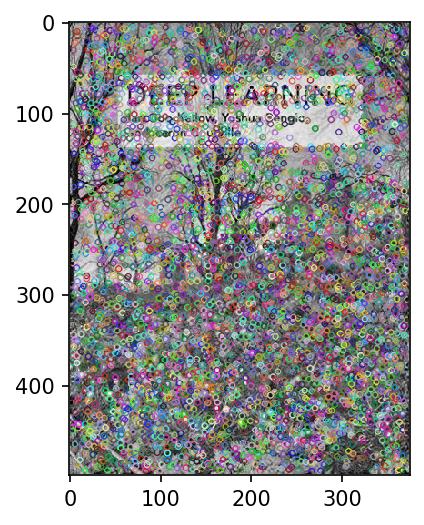

In [7]:
img_sift = cv2.drawKeypoints(img, keypoints_sift, None)
plt.imshow(img_sift)
plt.show()

## SURF

Fist, the SURF descriptor is created.

In [8]:
surf = cv2.xfeatures2d.SURF_create()

Then, using the SURF detector, it gets the keypoints and its corresponding descriptors.

In [9]:
keypoints_surf, descriptors_surf = surf.detectAndCompute(img, None)

Finally, the keypoints found is drew in the image.

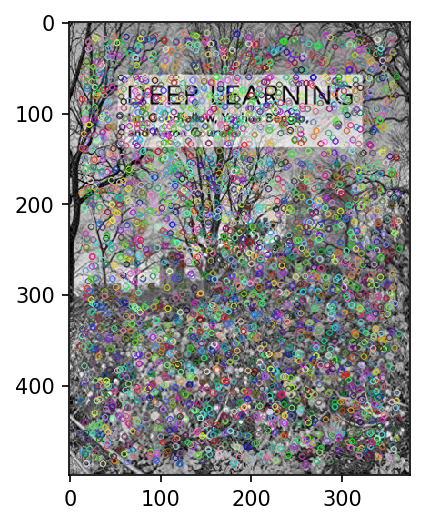

In [10]:
img_surf = cv2.drawKeypoints(img, keypoints_surf, None)
plt.imshow(img_surf)
plt.show()

## ORB

Fist, the ORB descriptor is created.

In [11]:
orb = cv2.ORB_create(nfeatures=4000)

Then, using the ORB detector, it gets the keypoints and its corresponding descriptors.

In [12]:
keypoints_orb, descriptors_orb = orb.detectAndCompute(img, None)

Finally, the keypoints found is drew in the image.

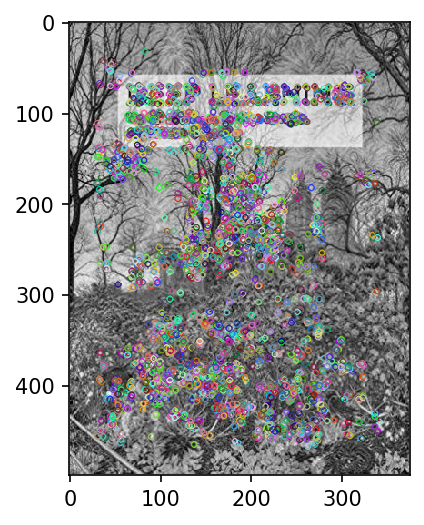

In [13]:
img_orb = cv2.drawKeypoints(img, keypoints_orb, None)
plt.imshow(img_orb)
plt.show()

## BRISK

Fist, the BRISK descriptor is created.

In [14]:
brisk = cv2.BRISK_create()

Then, using the BRISK detector, it gets the keypoints and its corresponding descriptors.

In [15]:
keypoints_brisk, descriptors_brisk = brisk.detectAndCompute(img, None)

Finally, the keypoints found is drew in the image.

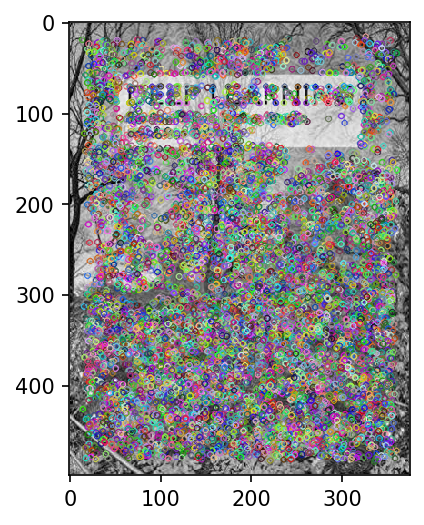

In [16]:
img_brisk = cv2.drawKeypoints(img, keypoints_brisk, None)
plt.imshow(img_brisk)
plt.show()

## Preconfiguration for matching

In [17]:
img_2 = cv2.imread("test_1.jpg", cv2.IMREAD_GRAYSCALE)

In [21]:
keypoints_orb_2, descriptors_orb_2 = orb.detectAndCompute(img_2, None)

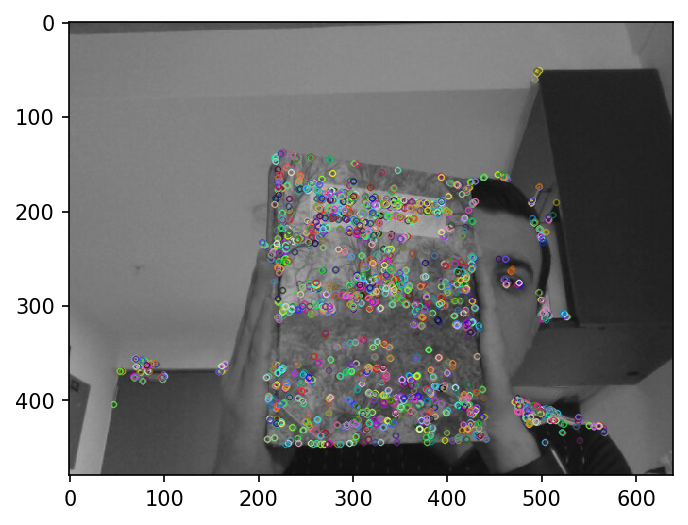

In [22]:
img_orb_2 = cv2.drawKeypoints(img_2, keypoints_orb_2, None)
plt.imshow(img_orb_2)
plt.show()

## Brute force matching

In [23]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_orb, descriptors_orb_2)
matches = sorted(matches, key = lambda x:x.distance)

In [31]:
matching_result = cv2.drawMatches(img, keypoints_orb, img_2, keypoints_orb_2, matches[:100], None, flags=2)

In [26]:
print(str(len(matches)))

926


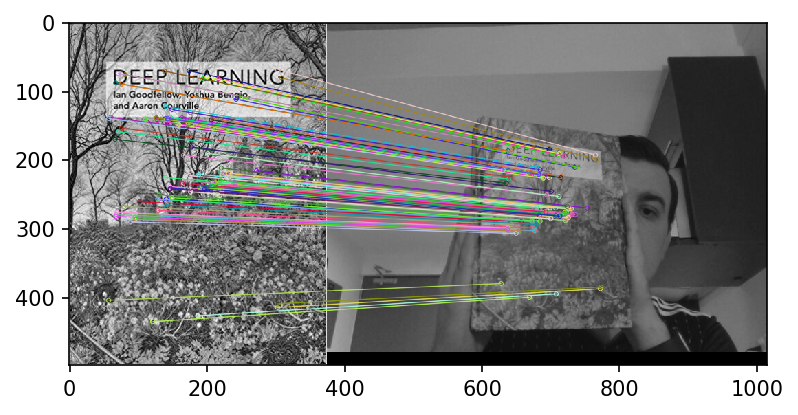

In [32]:
plt.imshow(matching_result)
plt.show()